# Computer Vision - Convolutional Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Get data from https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
import zipfile

# Unzip the data
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
# Check the structure
!dir /b pizza_steak

test
train


In [4]:
# Walk through the dir structure
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}.")

There are 2 directories and 0 files in pizza_steak.
There are 2 directories and 0 files in pizza_steak\test.
There are 0 directories and 250 files in pizza_steak\test\pizza.
There are 0 directories and 250 files in pizza_steak\test\steak.
There are 2 directories and 0 files in pizza_steak\train.
There are 0 directories and 750 files in pizza_steak\train\pizza.
There are 0 directories and 750 files in pizza_steak\train\steak.


In [5]:
# Another way to find out how many images are in the target directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_images_train

750

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


In [7]:
# Function to visialise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img


Image shape: (384, 512, 3)


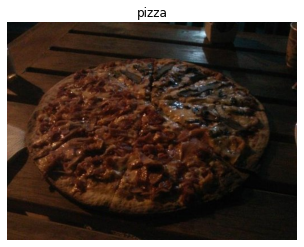

In [8]:
# Viewing random image
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [9]:
# Pre-processing image into tensor
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 5, 14, 13],
        [ 7, 16, 15],
        [ 8, 17, 16],
        ...,
        [42, 42, 34],
        [42, 42, 34],
        [37, 37, 29]],

       [[ 4, 13, 12],
        [ 6, 15, 14],
        [ 7, 16, 15],
        ...,
        [43, 43, 35],
        [48, 48, 40],
        [48, 48, 38]],

       [[ 4, 13, 12],
        [ 5, 14, 13],
        [ 6, 15, 14],
        ...,
        [40, 37, 28],
        [50, 47, 38],
        [55, 53, 41]],

       ...,

       [[64, 32, 17],
        [64, 32, 17],
        [61, 32, 14],
        ...,
        [17, 18, 12],
        [15, 16, 10],
        [11, 12,  6]],

       [[68, 36, 21],
        [68, 36, 21],
        [65, 36, 20],
        ...,
        [14, 15,  9],
        [14, 15,  9],
        [13, 14,  8]],

       [[69, 37, 22],
        [69, 37, 22],
        [66, 37, 21],
        ...,
        [13, 14,  8],
        [16, 17, 11],
        [17, 18, 12]]], dtype=uint8)>

In [10]:
# Get all the pixel values between 0 and 1
img / 255.

array([[[0.01960784, 0.05490196, 0.05098039],
        [0.02745098, 0.0627451 , 0.05882353],
        [0.03137255, 0.06666667, 0.0627451 ],
        ...,
        [0.16470588, 0.16470588, 0.13333333],
        [0.16470588, 0.16470588, 0.13333333],
        [0.14509804, 0.14509804, 0.11372549]],

       [[0.01568627, 0.05098039, 0.04705882],
        [0.02352941, 0.05882353, 0.05490196],
        [0.02745098, 0.0627451 , 0.05882353],
        ...,
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.18823529, 0.18823529, 0.15686275],
        [0.18823529, 0.18823529, 0.14901961]],

       [[0.01568627, 0.05098039, 0.04705882],
        [0.01960784, 0.05490196, 0.05098039],
        [0.02352941, 0.05882353, 0.05490196],
        ...,
        [0.15686275, 0.14509804, 0.10980392],
        [0.19607843, 0.18431373, 0.14901961],
        [0.21568627, 0.20784314, 0.16078431]],

       ...,

       [[0.25098039, 0.1254902 , 0.06666667],
        [0.25098039, 0.1254902 , 0.06666667],
        [0.23921569, 0

## Building CNN Model

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess the data (pixels between 0 and 1), i.e. scaling/normalisation
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set path to the image directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

# Building CNN model
model_cnn1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        padding="valid"
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_cnn1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_cnn1 = model_cnn1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 57s 1s/step - loss: 0.5558 - accuracy: 0.7107 - val_loss: 0.3909 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 52s 1s/step - loss: 0.4282 - accuracy: 0.8113 - val_loss: 0.3359 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 52s 1s/step - loss: 0.4023 - accuracy: 0.8107 - val_loss: 0.3467 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 52s 1s/step - loss: 0.3613 - accuracy: 0.8440 - val_loss: 0.3195 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 49s 1s/step - loss: 0.3209 - accuracy: 0.8707 - val_loss: 0.3134 - val_accuracy: 0.8820


In [12]:
# Understanding the epoch steps
len(train_data)

47

In [13]:
# Number of images divided by the batch size
1500 / 32

46.875

In [15]:
# Model summary
model_cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Testing our dataset with a non-CNN model

In [17]:
# Creating a model
model_non_cnn1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compiling the model
model_non_cnn1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_non_cnn1 = model_non_cnn1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 14s 280ms/step - loss: 0.7655 - accuracy: 0.5347 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 19s 400ms/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 18s 387ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 19s 403ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 19s 404ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
# Model's summary
model_non_cnn1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 4)                 602116    
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


## Trying to improve non-CNN m oodel's performance

In [22]:
# Creating another model
model_non_cnn2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_non_cnn2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_non_cnn2 = model_non_cnn2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 17s 341ms/step - loss: 2.3901 - accuracy: 0.6253 - val_loss: 0.7393 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5999 - accuracy: 0.7360 - val_loss: 0.4513 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5753 - accuracy: 0.7467 - val_loss: 0.5300 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 15s 320ms/step - loss: 0.9399 - accuracy: 0.6887 - val_loss: 1.4726 - val_accuracy: 0.5420
Epoch 5/5
47/47 [==============================] - 22s 459ms/step - loss: 0.5802 - accuracy: 0.7473 - val_loss: 0.4704 - val_accuracy: 0.7860


In [23]:
# Model's summary
model_non_cnn2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_15 (Dense)            (None, 100)               15052900  
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________
